In [2]:
!pip install sqlalchemy
!pip install pyodbc

In [56]:
from sqlalchemy import create_engine, MetaData, Table, inspect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [57]:
!pip install scipy
import scipy.stats as stats
import pandas as pd
from sqlalchemy import create_engine

database = "AdventureWorks2022"
host = "LAPTOP-26IQFQOB"

connection_string = f"mssql://LAPTOP-26IQFQOB/AdventureWorks2022?trusted_connection=yes&driver=ODBC+Driver+17+for+SQL+Server"
engine = create_engine(connection_string)

In [134]:
import scipy.stats as stats


query = """
SELECT 
    p.ProductID, 
    p.Name AS ProductName, 
    COUNT(th.TransactionID) AS NumberOfTransactions, 
    SUM(th.Quantity) AS TotalQuantitySold
FROM Production.TransactionHistoryArchive th
JOIN Production.Product p ON th.ProductID = p.ProductID
GROUP BY p.ProductID, p.Name
ORDER BY TotalQuantitySold DESC;
"""

# Replace 'connection' with your actual database connection
sales_data = pd.read_sql(query, con=connection)
sales_data

,ProductID,ProductName,NumberOfTransactions,TotalQuantitySold
0,3,BB Ball Bearing,786,537800
1,532,Seat Stays,786,282092
2,316,Blade,786,142314
3,331,Fork End,786,142314
4,324,Chain Stays,786,141046
...,...,...,...,...
492,464,Lock Washer 5,1,3
493,466,Lock Washer 6,1,3
494,470,Lock Washer 7,1,3
495,468,Lock Washer 8,1,3


In [162]:
df = pd.read_sql(sql="SELECT * FROM Production.TransactionHistoryArchive", con=connection)
df.head()

,TransactionID,ProductID,ReferenceOrderID,ReferenceOrderLineID,TransactionDate,TransactionType,Quantity,ActualCost,ModifiedDate
0,1,1,1,1,2011-04-16,P,4,50.2600,2011-04-16
1,2,359,2,1,2011-04-16,P,3,45.1200,2011-04-16
2,3,360,2,2,2011-04-16,P,3,45.5805,2011-04-16
3,4,530,3,1,2011-04-16,P,550,16.0860,2011-04-16
4,5,4,4,1,2011-04-16,P,3,57.0255,2011-04-16


In [164]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import sqlalchemy
print(df.columns)


Index(['TransactionID', 'ProductID', 'ReferenceOrderID',
       'ReferenceOrderLineID', 'TransactionDate', 'TransactionType',
       'Quantity', 'ActualCost', 'ModifiedDate'],
      dtype='object')


In [165]:
"""analysera av försäljningsdata över en femårsperiod och  får
genomsnittlig försäljningsvolym under denna period, komplett med ett mått
på osäkerhet genom konfidensintervallet.
"""

df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
filtered_df = df[(df['TransactionDate'].dt.year >= 2011) & (df['TransactionDate'].dt.year <= 2015)]
mean_quantity = filtered_df['Quantity'].mean()
sem_quantity = stats.sem(filtered_df['Quantity'], nan_policy='omit')
confidence_level = 0.95
ci = stats.norm.interval(confidence_level, loc=mean_quantity, scale=sem_quantity)

print(f"Confidence Interval for Average Quantity Sold (2011-2015): {ci}")

Confidence Interval for Average Quantity Sold (2011-2015): (31.212792060005857, 37.30721286980042)


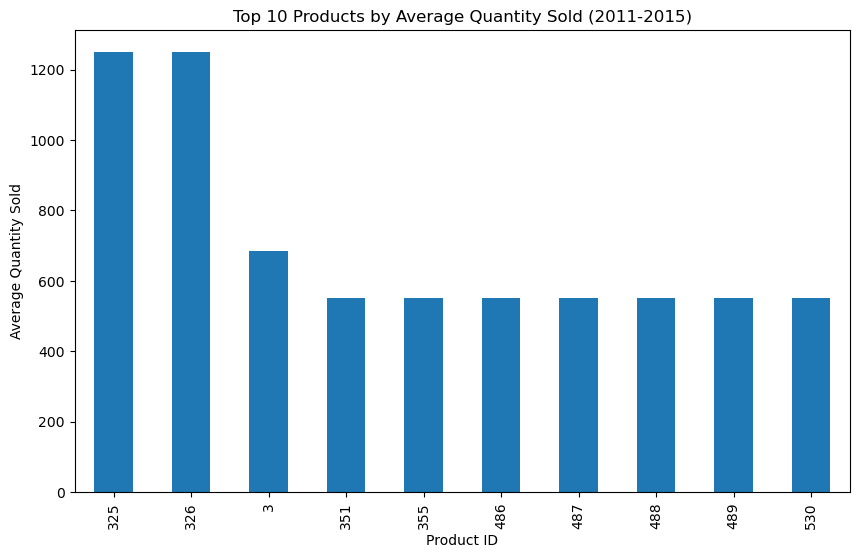

In [166]:
import pandas as pd
import matplotlib.pyplot as plt

"""örsäljningsprestandan för olika produkter under en femårsperiod, 
med ett särskilt fokus på att identifiera och visualisera de produkter 
som hade högst genomsnittlig försäljningsvolym. Genom att göra detta stödjer 
koden beslutsfattande relaterat till produktstrategi, lagerhantering och 
marknadsföringsinsatser."""

df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
filtered_df = df[(df['TransactionDate'].dt.year >= 2011) & (df['TransactionDate'].dt.year <= 2015)]
average_quantity_per_product = filtered_df.groupby('ProductID')['Quantity'].mean()
average_quantity_per_product = average_quantity_per_product.sort_values(ascending=False)
average_quantity_per_product.head(10).plot(kind='bar', figsize=(10, 6))  # Visa topp 10 produkter
plt.title('Top 10 Products by Average Quantity Sold (2011-2015)')
plt.xlabel('Product ID')
plt.ylabel('Average Quantity Sold')
plt.show()


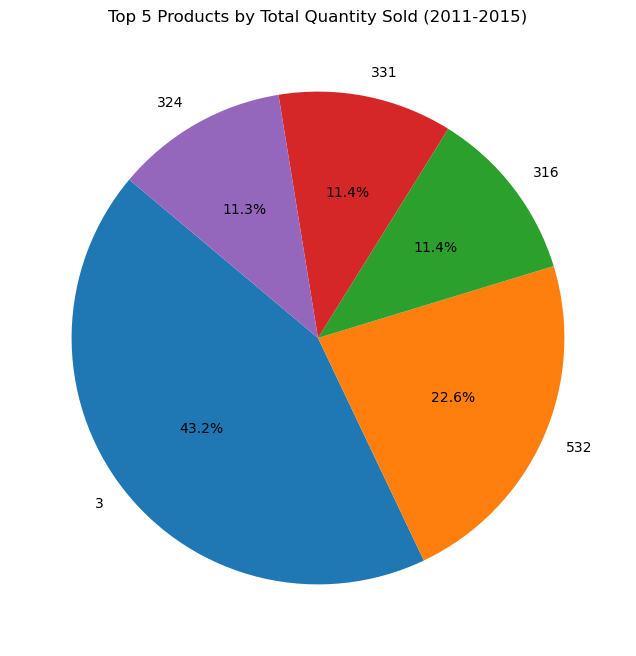

In [170]:
""" analysera och visualisera försäljningsdata, specifikt för att identifiera och 
framhäva de mest sålda produkterna under en viss tidsperiod
""" 
total_quantity_per_product = filtered_df.groupby('ProductID')['Quantity'].sum()
top_products = total_quantity_per_product.sort_values(ascending=False).head(5)
top_products.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), startangle=140)
plt.title('Top 5 Products by Total Quantity Sold (2011-2015)')
plt.ylabel('')  # Ta bort y-axelns etikett för estetik
plt.show()
